In [7]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the data from the .xlsx file
data = pd.read_excel('data1.xlsx')

# Define categorical variables
categorical_cols = ['SEX', 'CompositeStage', 'LNInvolment', 'Comorbidity', 'FamiliyHistoryOfCancer']
data[categorical_cols] = data[categorical_cols].astype('category')

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize the covariates
scaler = StandardScaler()
data_encoded[['DEATH', 'AGE']] = scaler.fit_transform(data_encoded[['DEATH', 'AGE']])

Iteration 1: norm_delta = 0.68300, step_size = 0.9500, log_lik = -1663.17959, newton_decrement = 54.49713, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.08068, step_size = 0.9500, log_lik = -1616.75385, newton_decrement = 1.16193, seconds_since_start = 0.1
Iteration 3: norm_delta = 0.00455, step_size = 0.9500, log_lik = -1615.59252, newton_decrement = 0.00340, seconds_since_start = 0.1
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1615.58912, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 4 iterations.
                              coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                                 
AGE                       0.026478   1.026831  0.056826       -0.084899   
SEX_2                    -0.027535   0.972841  0.107577       -0.238382   
CompositeStage_2         -0.151530   0.859392  0.173728       -0.492030   
CompositeStage_3          0.026319   1.026669  0.188558 

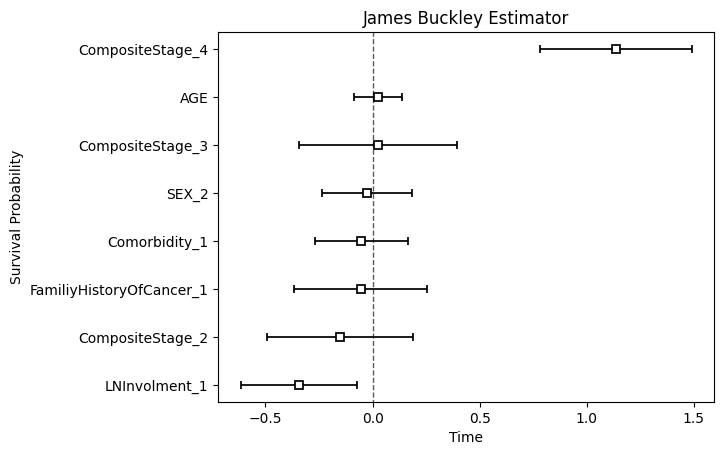

In [9]:
buckley_james_data = data_encoded[['Months', 'DEATH', 'AGE'] + [col for col in data_encoded.columns if col.startswith('SEX_') or col.startswith('CompositeStage_') or col.startswith('LNInvolment_') or col.startswith('Comorbidity_') or col.startswith('FamiliyHistoryOfCancer_')]]

# Fit the Buckley-James model with custom options
cph = CoxPHFitter(penalizer=0.1)
cph.fit(buckley_james_data, 'Months', 'DEATH', show_progress=True)
print(cph.summary)
cph.plot()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('James Buckley Estimator')
plt.show()

In [11]:
n = len(buckley_james_data)
llf = cph.log_likelihood_
k = cph.params_.shape[0]
aic = -2 * llf + 2 * k
bic = -2 * llf + k * np.log(n)
# Print AIC and BIC
print("AIC value of the above data:", aic)
print("BIC value of the above data:", bic)


AIC value of the above data: 3247.1782463546083
BIC value of the above data: 3277.880089931936


Iteration 1: norm_delta = 0.02554, step_size = 0.9500, log_lik = -1663.17959, newton_decrement = 0.12225, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.00120, step_size = 0.9500, log_lik = -1663.05786, newton_decrement = 0.00027, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.00006, step_size = 0.9500, log_lik = -1663.05758, newton_decrement = 0.00000, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00000, step_size = 1.0000, log_lik = -1663.05758, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence success after 4 iterations.
AIC value of SEX_2: 3330.115165027162
BIC value of SEX_2: 3337.790625921494
Iteration 1: norm_delta = 0.14622, step_size = 0.9500, log_lik = -1663.17959, newton_decrement = 4.31318, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.01327, step_size = 0.9500, log_lik = -1658.78794, newton_decrement = 0.03279, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.00073, step_size = 0.9500, log_lik = -1658.75515, newton_decreme

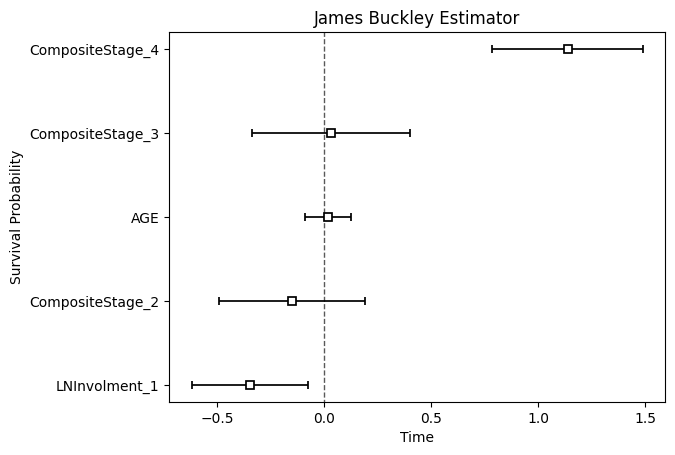

In [4]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from the .xlsx file
data = pd.read_excel('data1.xlsx')

# Define categorical variables
categorical_cols = ['SEX', 'CompositeStage', 'LNInvolment', 'Comorbidity', 'FamiliyHistoryOfCancer']
data[categorical_cols] = data[categorical_cols].astype('category')

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize the covariates
scaler = StandardScaler()
data_encoded[['DEATH', 'AGE']] = scaler.fit_transform(data_encoded[['DEATH', 'AGE']])
buckley_james_data = data_encoded[['Months', 'DEATH', 'AGE'] + [col for col in data_encoded.columns if col.startswith('SEX_') or col.startswith('CompositeStage_') or col.startswith('LNInvolment_') or col.startswith('Comorbidity_') or col.startswith('FamiliyHistoryOfCancer_')]]

# Perform univariate analysis
univariate_results = []
for col in buckley_james_data.columns:
    if col not in ['Months', 'DEATH', 'AGE']:
        cph_univariate = CoxPHFitter(penalizer=0.1)
        cph_univariate.fit(buckley_james_data[[col, 'Months', 'DEATH', 'AGE']], 'Months', 'DEATH', show_progress=True)
        p_value = cph_univariate.summary['p'][col]
        univariate_results.append((col, p_value))
        n = len(buckley_james_data)
        llf = cph_univariate.log_likelihood_
        k = cph_univariate.params_.shape[0]
        aic = -2 * llf + 2 * k
        bic = -2 * llf + k * np.log(n)
        print(f"AIC value of {col}:", aic)
        print(f"BIC value of {col}:", bic)

# Select significant variables
significant_variables = [var for var, p_value in univariate_results if p_value < 0.05]
print("Significant variables from univariate analysis:", significant_variables)

# Fit the multivariate model
cph_multivariate = CoxPHFitter(penalizer=0.1)
cph_multivariate.fit(buckley_james_data[['Months', 'DEATH', 'AGE'] + significant_variables], 'Months', 'DEATH', show_progress=True)

# Calculate AIC and BIC
n = len(buckley_james_data)
llf = cph_multivariate.log_likelihood_
k = cph_multivariate.params_.shape[0]
aic = -2 * llf + 2 * k
bic = -2 * llf + k * np.log(n)

# Print AIC and BIC
print("AIC value of the multivariate model:", aic)
print("BIC value of the multivariate model:", bic)

# Plot the survival probability
cph_multivariate.plot()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('James Buckley Estimator')
plt.show()
